In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from pandas.plotting import scatter_matrix
import statsmodels.api as sm

## Problem 1

In [2]:
#a. read in data
df=pd.read_csv("Auto.csv", na_values='?')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


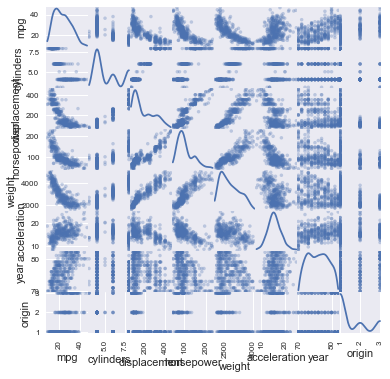

In [3]:
#b. scatterplot matrix
df.dropna(inplace=True)

df_quant=df[['mpg','cylinders','displacement','horsepower',
             'weight','acceleration','year','origin']]
df_quant=df_quant.astype(float)
scatter_matrix(df_quant, alpha=0.3, ax=None, figsize=(6,6),diagonal='kde')
plt.show()

In [4]:
#c. correlation matrix
df_quant.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [5]:
#d. multiple linear regression model
Y=df_quant['mpg']
X = sm.add_constant(df_quant[['cylinders','displacement','horsepower','weight',
                              'acceleration','year','origin']])
reg1 = sm.OLS(Y, X)
results = reg1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 18 Feb 2019   Prob (F-statistic):          2.04e-139
Time:                        23:10:33   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

i). Coefficients of displacements, weight, year, and origin are statisticaly significant at the 1% level.

ii). Coefficients of Cylinders, horsepower, acceleration are not statisticaly significant at the 10% level.

iii). Ceteris paribus, one more year is associated with 0.75 unit increase in mpg.

In [6]:
#e. New Regression
df_quant['cylinders^2']=np.square(df_quant['cylinders'])
df_quant['displacement^2']=np.square(df_quant['displacement'])
df_quant['origin^2']=np.square(df_quant['origin'])
df_quant['acceleration^2']=np.square(df_quant['acceleration'])

X2 = sm.add_constant(df_quant[['cylinders','displacement','horsepower','weight',
                              'acceleration','year','origin',
                               'cylinders^2','displacement^2','origin^2','acceleration^2']])
reg2 = sm.OLS(Y, X2)
results2 = reg2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     207.9
Date:                Mon, 18 Feb 2019   Prob (F-statistic):          2.99e-153
Time:                        23:10:33   Log-Likelihood:                -979.27
No. Observations:                 392   AIC:                             1983.
Df Residuals:                     380   BIC:                             2030.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2019      7.474     -0.

i). Three variables identified are cylinders, displacement, origin.

ii). Adjusted $R^2$ is 0.853, which is worse than 0.818 in the first model.

iii). They are all statisticaly significant at the 1% level.

iv). Cylinders variable is not statisticaly significant at the 5% level.

In [7]:
#f. predict value
X1=[1,6,200,100,3100,15.1,99,1,6**2, 200**2, 1**2, 15.1**2]
results2.predict(X1)

array([38.67266199])

The predicted mpg is 39 of a car with cylinders displacement of 200, horsepower of 100, a weight of 3,100, acceleration of 15.1, model year of 1999, and origin of 1.

## Problem 2

In [8]:
#Red: 0; Green; 1
tab=pd.DataFrame({"X1":[0,2,0,0,-1,1], "X2":[3,0,1,1,0,1],
                 "X3":[0,0,3,2,1,1],"Y":["Red","Red","Red","Green","Green","Red"]})
tab["Dist"]=round(np.sqrt(tab["X1"]**2+tab["X2"]**2+tab["X3"]**2),2)
tab.index+=1
tab

,X1,X2,X3,Y,Dist
1,0,3,0,Red,3.00
2,2,0,0,Red,2.00
3,0,1,3,Red,3.16
4,0,1,2,Green,2.24
5,-1,0,1,Green,1.41
6,1,1,1,Red,1.73


a.

D1=3

D2=2

D3=$\sqrt10$

D4=$\sqrt5$

D5=$\sqrt2$

D6=$\sqrt3$


b.

The nearest neighbor is the 5th observation (green). So the KNN oprediction is green.

c.

The 3 nearest neighbors are the 2nd, 5th, 6th observations. Their labels are Red, Green, and Red. The probability of being red is larger than being green (2/3 > 1/3). So the KNN prediction is red.

d. 

If the optimal Bayes decision boundary is highly nonlinear, it indicates the model has low bias and high variance, which corresponding to small K.


In [9]:
#e.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
neigh=knn.fit(tab[["X1","X2","X3"]], tab["Y"])
print("The KNN classifier of the test point X1 = X2 = X3 = 1 with K = 2:",
      neigh.predict([(0,0,0)])[0])


The KNN classifier of the test point X1 = X2 = X3 = 1 with K = 2: Green


## Problem 3

In [10]:
#a.
df['mpg high']=np.where(df['mpg']>np.median(df['mpg']),1,0)
X = sm.add_constant(df_quant[['cylinders','displacement','horsepower','weight',
                              'acceleration','year','origin']])
log1 = sm.Logit(df['mpg high'], X)
resultslog = log1.fit()
print(resultslog.summary())

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               mpg high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Mon, 18 Feb 2019   Pseudo R-squ.:                  0.7101
Time:                        23:10:34   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626

Coefficients of weight and Year are statistically significant at the 5% level.

In [11]:
# b.
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['mpg high'], 
                                                    test_size = 0.5, random_state=10)

In [16]:
# c.
from sklearn.linear_model import LogisticRegression
log2 = LogisticRegression().fit(X_train, y_train)
coeff=pd.concat([pd.DataFrame(X.columns,columns=["Name"]),
                 pd.DataFrame(np.transpose(log2.coef_),columns=["Value"])],axis = 1)
coeff

C:\Users\lliu9\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Name,Value
0,const,-0.031443
1,cylinders,-0.325709
2,displacement,0.000346
3,horsepower,-0.052389
4,weight,-0.004914
5,acceleration,-0.181123
6,year,0.309457
7,origin,-0.092646


In [13]:
# d.
y_pred = log2.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0])

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[86, 13],
       [12, 85]], dtype=int64)

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        99
           1       0.87      0.88      0.87        97

   micro avg       0.87      0.87      0.87       196
   macro avg       0.87      0.87      0.87       196
weighted avg       0.87      0.87      0.87       196



The F1-scores are same. This model predicts equally well on low mpg and high mpg.